# Titanic Study Case - Kaggle

## Steps
1. Importing the libraries
2. Importing the dataset (train and test) then split the train data
3. Exploratory Data Analysis
4. Data Preprocessing
5. Model Building
6. Model Evaluation
7. Submission

## 1. Importing the libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import altair as alt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load Dataset

1. Import the train and test datasets
2. Split the train dataset into train and validation datasets
3. Check the shape of the datasets
4. Check the first 5 rows of the datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 

# Check data shape
print(f"Training data has: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Testing data has: {test.shape[0]} rows and {test.shape[1]} columns")
train = train.drop_duplicates()
print(f"Train data after removing duplicates: {train.shape[0]} rows and {train.shape[1]} columns")

 

# Display first 5 rows of training data & test data
display(train.head(3))
display(test.head(3))

 

# Split Train to train and validation
df_train, df_val = train_test_split(train, test_size=0.2, random_state=200)
print("Split Train data to df_train and df_val")
print(f"Train data has: {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Validation data has: {df_val.shape[0]} rows and {df_val.shape[1]} columns")

Training data has: 891 rows and 12 columns
Testing data has: 418 rows and 11 columns
Train data after removing duplicates: 891 rows and 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Split Train data to df_train and df_val
Train data has: 712 rows and 12 columns
Validation data has: 179 rows and 12 columns


## 3. Exploratory Data Analysis

Doing EDA to df_train that already splitted

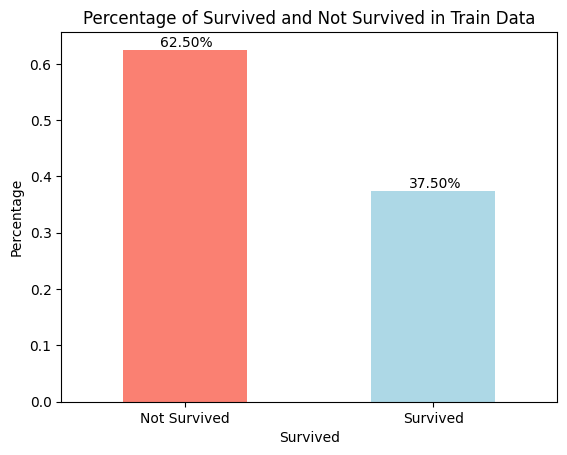

In [5]:
# How many Survived in df_train
survived = df_train['Survived'].value_counts(normalize=True)
survived.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Percentage of Survived and Not Survived in Train Data')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)

# Add data labels above the bars
for i in range(len(survived)):
    plt.text(i-0.1, survived[i]+0.005, f"{survived[i]*100:.2f}%")
plt.show()

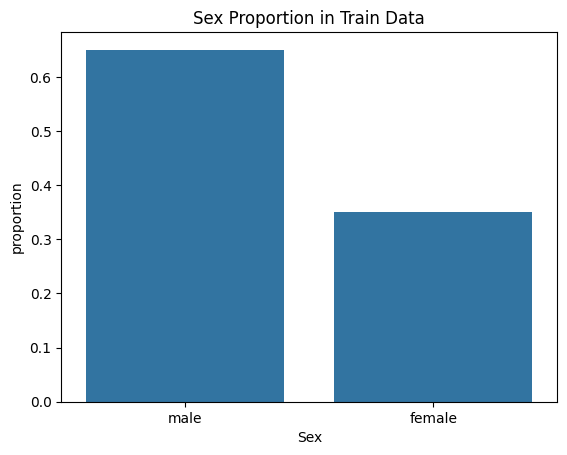

In [6]:
sex_count_normalize = df_train['Sex'].value_counts(normalize=True).reset_index()

# Plot using Seaborn
sns.barplot(data=sex_count_normalize, x='Sex', y='proportion')
plt.title('Sex Proportion in Train Data')
plt.show()

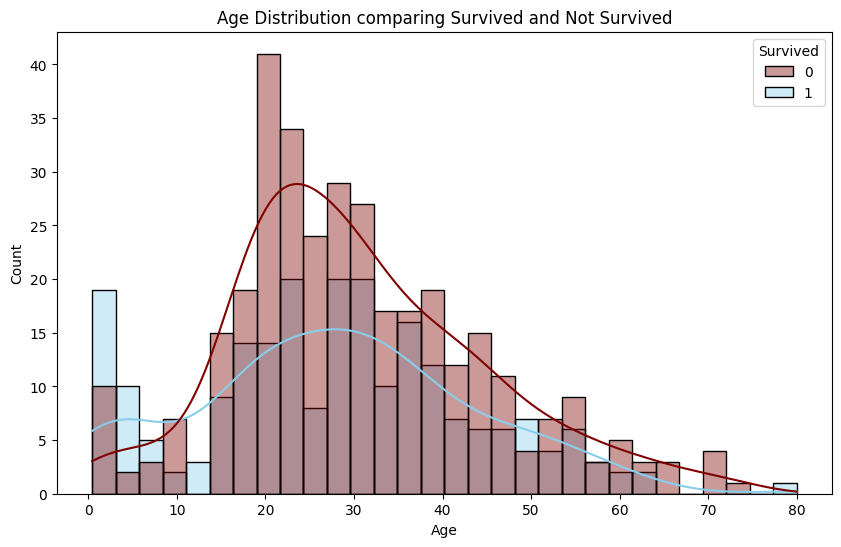

In [7]:
# Histogram of Age comparing Survived and Not Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True, bins=30, palette=['maroon', 'skyblue'], alpha=0.4)
plt.title('Age Distribution comparing Survived and Not Survived')
plt.show()

In [8]:
# Using Altair
age_hist = alt.Chart(
    df_train.assign(Survived=df_train['Survived'].astype(str))
).mark_bar().encode(
    x=alt.X('Age', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Survived'
).properties(
    width=600,
    height=400,
    title='Age Distribution comparing Survived and Not Survived'
)
age_hist

alt.Chart(...)

### Statistical EDA

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,567.000000,712.000000,712.000000,712.000000
mean,444.380618,0.375000,2.332865,29.423580,0.497191,0.382022,31.187136
std,259.341164,0.484463,0.830257,14.867013,1.029791,0.809655,45.495665
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,439.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.895850
75%,668.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,889.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


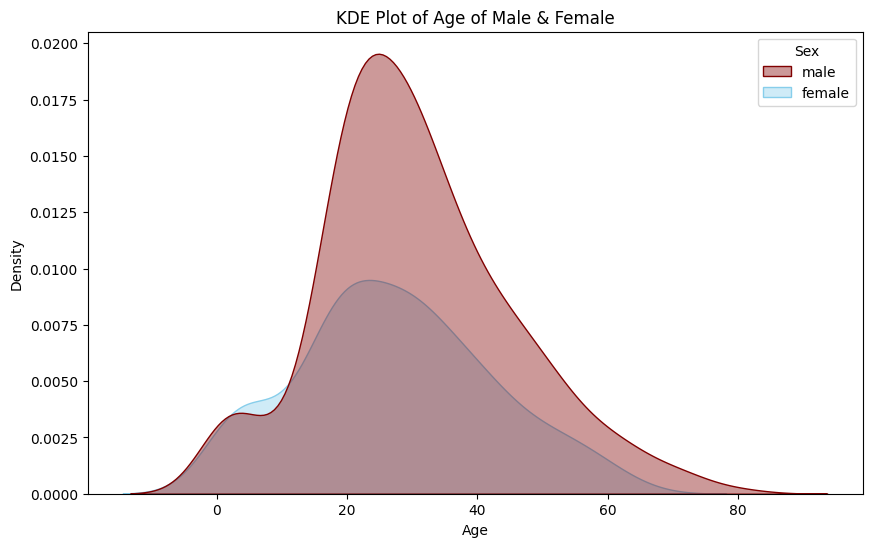

In [10]:
# KDE Plot Age
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_train, x='Age', hue='Sex', fill=True, palette=['maroon', 'skyblue'], alpha=0.4)
plt.title('KDE Plot of Age of Male & Female')
plt.show()

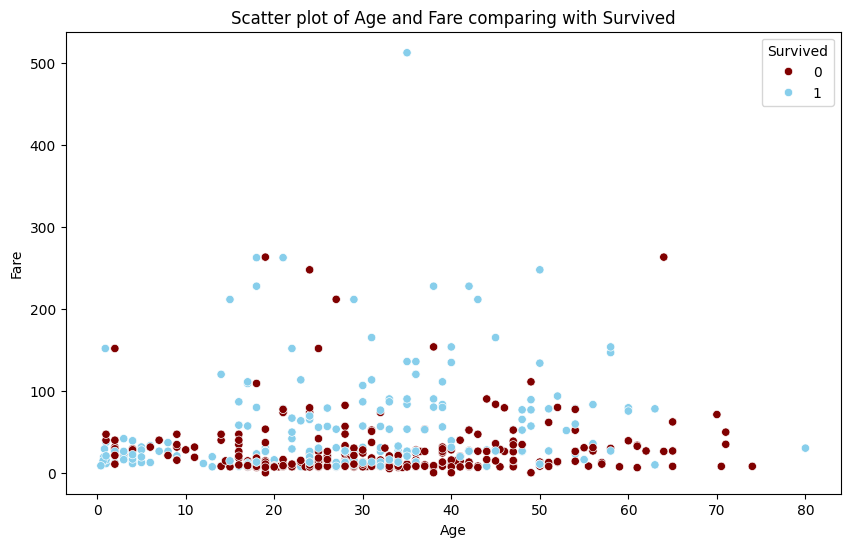

In [11]:
# Scatter plot of Age and Fare comparing with Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Survived', palette=['maroon', 'skyblue'])
plt.title('Scatter plot of Age and Fare comparing with Survived')
plt.show()

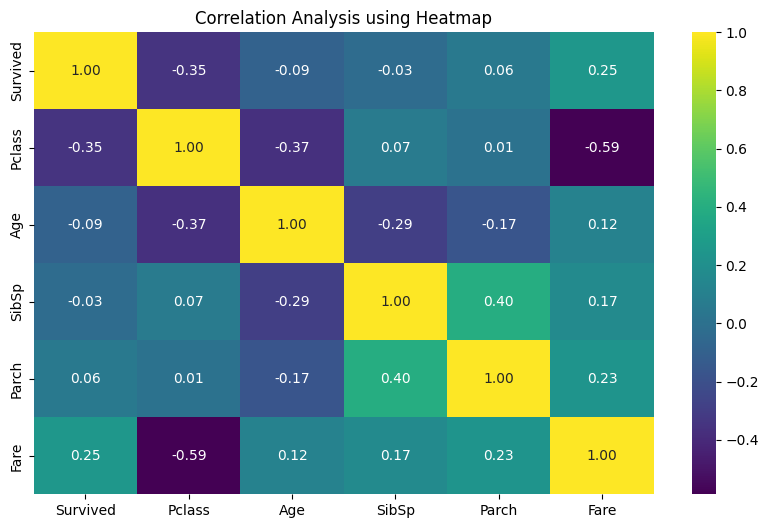

In [12]:
# Correlation Analysis using Heatmap
corr_train = df_train.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId', 'Sex']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_train, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Analysis using Heatmap')
plt.show()

## 4. Data Preprocessing

### Check Missing Values

In [15]:
df_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C


In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         1
dtype: int64

### Imputation Strategy
1. Age: diisi mean
2. Cabin: didrop columnya karena terlalu banyak missing values
3. Embarked: diisi modus

### Preprocessing Strategy
1. pecah kolom Survived jadi X dan y
2. Drop column Name, Ticket, Cabin
3. One Hot Encoding untuk Sex dan Embarked
4. Scaling untuk Age dan Fare, menggunakan StandardScaler untuk Fare dan MinMaxScaler untuk Age
5. Bungkus sebagai Pipeline dengan ColumnTransformer

In [19]:
# 1. Pecah kolom Survived dari df_train dan df_val
unused_columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin']
X_train = df_train.drop(columns=unused_columns)
y_train = df_train['Survived'].values.reshape(-1, 1)
X_val = df_val.drop(columns=unused_columns)
y_val = df_val['Survived'].values.reshape(-1, 1)

In [24]:
# Pipeline
age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
fare_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
category_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])
# Column Transformer
preprocessor = ColumnTransformer([
    ('age', age_pipeline, ['Age']),
    ('fare', fare_pipeline, ['Fare']),
    ('category', category_pipeline, ['Sex', 'Embarked']), 
    ],
    remainder='passthrough'
)

In [25]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('fare',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Fare']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Sex', 'Embarked'])])

In [29]:
# Apply Fit to X_train
preprocessor.fit(X_train)

# Apply Transform to X_train and X_val
X_train_preprocessed = preprocessor.transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

In [30]:
X_train_preprocessed

array([[ 0.36445816, -0.53512657,  0.        , ...,  3.        ,
         0.        ,  0.        ],
       [ 0.2083438 , -0.53081764,  0.        , ...,  3.        ,
         1.        ,  0.        ],
       [ 0.10781603, -0.23451974,  0.        , ...,  3.        ,
         0.        ,  2.        ],
       ...,
       [ 0.30887158, -0.53091002,  0.        , ...,  3.        ,
         0.        ,  0.        ],
       [ 0.32143755, -0.33185013,  1.        , ...,  3.        ,
         1.        ,  0.        ],
       [ 0.30887158, -0.51230617,  0.        , ...,  3.        ,
         0.        ,  0.        ]])

In [31]:
import pickle
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)